In [205]:
#Desde pandas

# Import libraries
import pandas as pd
#!pip install folium
import folium
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [206]:
pd.set_option('max_columns', 60)

In [207]:
#Desde colab
#from google.colab import drive
#drive.mount('/content/drive')
#_data = pd.read_csv("/content/drive/My Drive/Datos/Entrenamieto_ECI_2020.csv")

### TP

#### Sin Filtro

In [208]:
_data = pd.read_csv("../Data/Entrenamieto_ECI_2020.csv")
#cambio algunos nombres de paises que no estan en folium
_data.replace({"Macedonia, the former Yugoslav Republic of":"Macedonia",\
           "Korea, Democratic People's Republic of":"South Korea",\
           "Korea, Republic of":"South Korea", "Viet Nam":"Vietnam",\
           "United States":"United States of America",
           "French Southern Territories":"French Southern and Antarctic Lands"},inplace=True)


#### Currency total taxable != currency amoun

In [209]:
_data["cumpled_"] = (_data["Total_Amount_Currency"]!= _data["Total_Taxable_Amount_Currency"])


In [210]:
_data["cumpled_"].value_counts()

False    16914
True        33
Name: cumpled_, dtype: int64

In [211]:
diferentes = _data[_data["cumpled_"]==True]
diferentes[["ASP_Currency","ASP_(converted)_Currency","Total_Amount_Currency","Total_Taxable_Amount_Currency"]]

,ASP_Currency,ASP_(converted)_Currency,Total_Amount_Currency,Total_Taxable_Amount_Currency
1594,EUR,USD,EUR,USD
2200,USD,USD,USD,JPY
3579,GBP,USD,GBP,EUR
3683,USD,USD,USD,EUR
3940,USD,USD,USD,EUR
...,...,...,...,...
16178,USD,USD,USD,EUR
16349,USD,USD,USD,EUR
16634,USD,USD,USD,EUR
16635,USD,USD,USD,EUR


In [212]:
amount = _data.groupby(["Month","ASP_Currency","ASP_(converted)_Currency","Total_Amount_Currency","Total_Taxable_Amount_Currency"]).agg({"Stage":[pd.Series.mode,"count"]})

In [213]:
#pd.set_option('max_rows', 3020)
#amount

In [214]:
amount["Stage"]["count"].sum()

16947

In [215]:
amount = _data.groupby(["Opportunity_Name"]).agg({'Total_Amount':'sum', 'Total_Taxable_Amount':[pd.Series.mode,"count"], "Stage":pd.Series.mode,"Total_Taxable_Amount_Currency":pd.Series.mode}).reset_index()

In [216]:
level_0 = amount.columns.get_level_values(0)

In [217]:
level_1 = amount.columns.get_level_values(1)

In [218]:
amount.columns = level_0 + "-" + level_1

In [219]:
amount["cumple"] = (amount["Total_Taxable_Amount-mode"]!= amount["Total_Amount-sum"])

amount["mayor"] = amount[["Total_Taxable_Amount-mode","Total_Amount-sum"]].max(axis=1)

In [220]:
amount["cumple"].value_counts()

False    9079
True      762
Name: cumple, dtype: int64

In [221]:
amount["diff"] = abs((amount["Total_Taxable_Amount-mode"] - amount["Total_Amount-sum"]))
amount["diff"] =amount["diff"].apply(lambda x: 1 if x< 1 else x)

In [222]:
amount

,Opportunity_Name-,Total_Amount-sum,Total_Taxable_Amount-mode,Total_Taxable_Amount-count,Stage-mode,Total_Taxable_Amount_Currency-mode,cumple,mayor,diff
0,Opportunity_Name_0,3.494400e+06,3.494400e+06,7,Closed Lost,USD,False,3.494400e+06,1.0
1,Opportunity_Name_1,2.193100e+06,2.193100e+06,7,Closed Lost,USD,False,2.193100e+06,1.0
2,Opportunity_Name_100,5.437800e+05,5.437800e+05,1,Closed Won,EUR,False,5.437800e+05,1.0
3,Opportunity_Name_1000,1.421420e+08,1.421420e+08,1,Closed Lost,JPY,False,1.421420e+08,1.0
4,Opportunity_Name_10000,1.960000e+04,0.000000e+00,1,Closed Lost,USD,True,1.960000e+04,19600.0
...,...,...,...,...,...,...,...,...,...
9836,Opportunity_Name_9992,1.751904e+05,0.000000e+00,1,Closed Lost,USD,True,1.751904e+05,175190.4
9837,Opportunity_Name_9995,1.043490e+06,1.043490e+06,2,Closed Lost,USD,False,1.043490e+06,1.0
9838,Opportunity_Name_9996,7.902469e+05,7.902469e+05,1,Closed Lost,EUR,False,7.902469e+05,1.0
9839,Opportunity_Name_9997,3.799810e+06,3.799810e+06,1,Closed Lost,USD,False,3.799810e+06,1.0


In [223]:
discrepancias = amount[amount["cumple"]==True]

discrepancias["log diferencia"] = discrepancias["diff"].apply(lambda x: np.log(x) if x!=0 else x)



c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [224]:
cant_k_cumple = amount.groupby(["cumple"]).agg({'diff':'count'}).reset_index().rename(columns={"diff": "cantidad"})
cant_k_cumple

,cumple,cantidad
0,False,9079
1,True,762


Text(0, 0.5, 'Discrepancias')

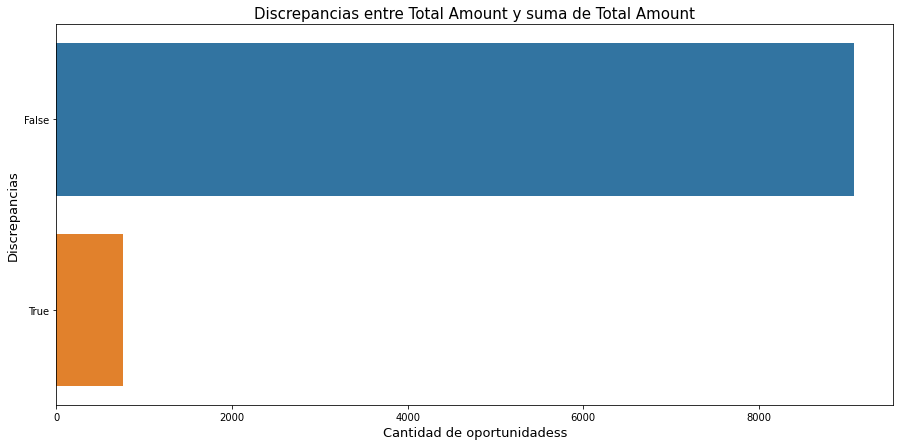

In [225]:
plt.rcParams['figure.figsize'] = (15, 7)

g = sns.barplot(y =cant_k_cumple["cumple"] , x=cant_k_cumple["cantidad"] , orient='h',)
g.set_title("Discrepancias entre Total Amount y suma de Total Amount", fontsize=15)
g.set_xlabel("Cantidad de oportunidadess", fontsize=13,)
g.set_ylabel("Discrepancias", fontsize=13)

c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 20.200000000000003, 'Log de la diferencia')

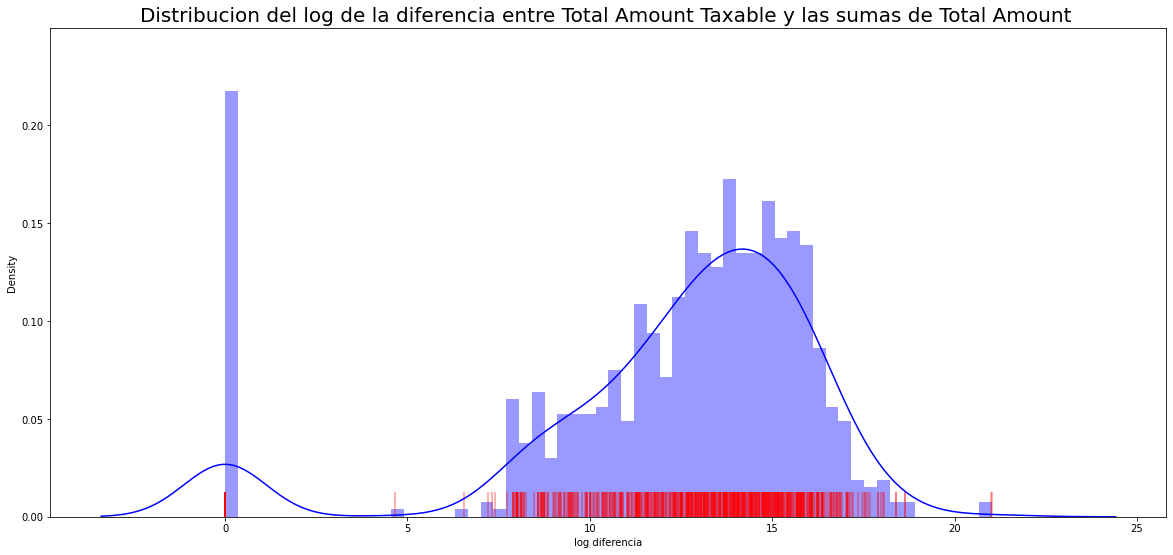

In [226]:
plt.rcParams['figure.figsize'] = (20, 9)
# Import library and dataset
import seaborn as sns
 
# Hist only
hist=sns.distplot( a=discrepancias["log diferencia"],hist=True, kde=True, rug=True,color="blue", bins=60, rug_kws={"color": "r", "alpha":0.3, "linewidth": 2, "height":0.05 }  )
hist.set_title("Distribucion del log de la diferencia entre Total Amount Taxable y las sumas de Total Amount ", fontsize=20)
g.set_xlabel("Log de la diferencia", fontsize=13,)
#sns.plt.show()
 


In [227]:
len(discrepancias["log diferencia"].unique())

655

#### Filtrando

In [228]:
#_data["Opportunity_Name"].value_counts()

In [229]:
#quitar filas que no tienen valor de ASP o ASP_converted
data = _data.dropna(subset=["ASP_(converted)","ASP"])

In [230]:
#Cantidad de filas quitadas porque no tienen valor de ASP o ASP_converted, para convertir el Total Amount a una misma moneda
len(_data.index) - len(data.index)

3209

In [231]:
data["Value_ASP_converted_to_ASP"]=data["ASP_(converted)"]/data["ASP"]
data["Total_Amount_converted"]=data["Total_Amount"] * data["Value_ASP_converted_to_ASP"]
data["Total_Taxable_Amount_converted"]=data["Total_Taxable_Amount"] * data["Value_ASP_converted_to_ASP"]

c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [232]:
amount = data.groupby(["Opportunity_Name",'Billing_Country']).agg({'Total_Amount_converted':'sum', 'Total_Taxable_Amount_converted':["mean","count"], "Stage":pd.Series.mode}).reset_index()

In [233]:
pd.set_option('max_rows', 100)
amount

Opportunity_Name           Billing_Country Total_Amount_converted  \
                                                                          sum   
0         Opportunity_Name_0  United States of America           3.494400e+06   
1         Opportunity_Name_1  United States of America           2.193100e+06   
2       Opportunity_Name_100                   Germany           6.150605e+05   
3      Opportunity_Name_1000                     Japan           1.277917e+06   
4     Opportunity_Name_10000                 Indonesia           1.960000e+04   
...                      ...                       ...                    ...   
9827   Opportunity_Name_9992  United States of America           1.751904e+05   
9828   Opportunity_Name_9995  United States of America           1.038240e+06   
9829   Opportunity_Name_9996                   Germany           8.938392e+05   
9830   Opportunity_Name_9997                 Australia           3.799810e+06   
9831   Opportunity_Name_9998  United States of America           3.603600e+05   

     Total_Taxable_Amount_converted              Stage  
                               mean count         mode  
0                      3.494400e+06     7  Closed Lost  
1                      2.193100e+06     7  Closed Lost  
2                      6.150605e+05     1   Closed Won  
3                      1.277917e+06     1  Closed Lost  
4                      0.000000e+00     1  Closed Lost  
...                             ...   ...          ...  
9827                   0.000000e+00     1  Closed Lost  
9828                   1.043490e+06     1  Closed Lost  
9829                   8.938392e+05     1  Closed Lost  
9830                   3.799810e+06     1  Closed Lost  
9831                   3.626100e+05     1  Closed Lost  

[9832 rows x 6 columns]

In [178]:
level_0 = amount.columns.get_level_values(0)

In [179]:
level_1 = amount.columns.get_level_values(1)

In [180]:
amount.columns = level_0 + "-" + level_1

In [181]:
pd.set_option('max_rows', 100)
amount

,Opportunity_Name-,Billing_Country-,Total_Amount_converted-sum,Total_Taxable_Amount_converted-mean,Total_Taxable_Amount_converted-count,Stage-mode
0,Opportunity_Name_0,United States of America,3.494400e+06,3.494400e+06,7,Closed Lost
1,Opportunity_Name_1,United States of America,2.193100e+06,2.193100e+06,7,Closed Lost
2,Opportunity_Name_100,Germany,6.150605e+05,6.150605e+05,1,Closed Won
3,Opportunity_Name_1000,Japan,1.277917e+06,1.277917e+06,1,Closed Lost
4,Opportunity_Name_10000,Indonesia,1.960000e+04,0.000000e+00,1,Closed Lost
...,...,...,...,...,...,...
9827,Opportunity_Name_9992,United States of America,1.751904e+05,0.000000e+00,1,Closed Lost
9828,Opportunity_Name_9995,United States of America,1.038240e+06,1.043490e+06,1,Closed Lost
9829,Opportunity_Name_9996,Germany,8.938392e+05,8.938392e+05,1,Closed Lost
9830,Opportunity_Name_9997,Australia,3.799810e+06,3.799810e+06,1,Closed Lost


In [182]:
solo_country=data.groupby(["Billing_Country","Opportunity_Name"]).agg({"Stage":"count"}).reset_index()
solo_country

,Billing_Country,Opportunity_Name,Stage
0,Albania,Opportunity_Name_2274,1
1,Albania,Opportunity_Name_9148,1
2,Argentina,Opportunity_Name_1470,1
3,Armenia,Opportunity_Name_4187,2
4,Australia,Opportunity_Name_10112,4
...,...,...,...
9827,Vietnam,Opportunity_Name_4256,1
9828,Vietnam,Opportunity_Name_5311,1
9829,Vietnam,Opportunity_Name_5351,1
9830,Vietnam,Opportunity_Name_8584,2


In [185]:
#TIPOS UNICOS DE PAISES QUE EMITEN FACTURAS
pd.set_option('max_rows', None)

solo_country["Billing_Country"].unique()

array(['Albania', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Canada', 'Chile', 'China', 'Colombia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia',
       'France', 'French Southern and Antarctic Lands', 'Germany',
       'Ghana', 'Greece', 'Hungary', 'India', 'Indonesia', 'Ireland',
       'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Kuwait',
       'Lebanon', 'Libya', 'Liechtenstein', 'Luxembourg', 'Macedonia',
       'Malaysia', 'Malta', 'Mexico', 'Morocco', 'Myanmar', 'Netherlands',
       'New Zealand', 'None', 'Norway', 'Oman', 'Pakistan', 'Palestine',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico',
       'Reunion', 'Saudi Arabia', 'Singapore', 'Slovakia', 'South Africa',
       'South Korea', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland',
       'Taiwan', 'Thailan

In [188]:
stage_won = amount[amount["Stage-mode"]=="Closed Won"]

#### Cuantos Won en cada pais

In [189]:
country_won=stage_won["Billing_Country-"].value_counts().to_frame().reset_index()
country_won

,index,Billing_Country-
0,Japan,1290
1,United States of America,1058
2,Germany,670
3,Australia,382
4,India,236
5,Singapore,209
6,Netherlands,188
7,Spain,104
8,Italy,93
9,France,90


In [190]:
#Quito el Pais NONE en billing...
coin_country_ = country_won.drop(country_won[country_won['index']=="None"].index)

In [191]:
#ln de la cantidad de billing con esa moneda para hacerla mas visible en una escala menor
import numpy as np 
coin_country_["Billing_Country-"]= np.log(coin_country_["Billing_Country-"])
coin_country_

,index,Billing_Country-
0,Japan,7.162397
1,United States of America,6.964136
2,Germany,6.507278
3,Australia,5.945421
4,India,5.463832
5,Singapore,5.342334
6,Netherlands,5.236442
7,Spain,4.644391
8,Italy,4.532599
9,France,4.499810


In [192]:
world_geo = os.path.join('..\Data', 'world-countries.json')

In [203]:

# Initialize the map:
m = folium.Map(location=[0, -0], zoom_start=2)
 
# Add the color for the chloropleth:
folium.Choropleth(
     geo_data=world_geo,
     data=coin_country_,
     columns=['index','Billing_Country-'],
     key_on='feature.properties.name',
     fill_color='BuPu',
     nan_fill_color='white',
     fill_opacity=0.7,
     line_opacity=0.2,
     legend_name='ln Cantidad de Oporunidades (%)',
     reset=True
).add_to(m)


title_html = '''
             <h3 align="center" style="font-size:14px"><b>{}</b></h3>
             '''.format("Mapamundi de cantidad de Oportunidades Won por Paises")   

m.get_root().html.add_child(folium.Element(title_html))
m.save('Won.html')

m

#### Oportundades en cada Pais

In [198]:
#CUANTOS DE CADA STAGE
coin_country=solo_country["Billing_Country"].value_counts().to_frame().reset_index()
coin_country

,index,Billing_Country
0,United States of America,2344
1,Japan,1897
2,Germany,1308
3,India,560
4,Australia,559
5,Netherlands,394
6,France,344
7,Singapore,303
8,Italy,214
9,Spain,201


In [199]:
#Quito el Pais NONE en billing...
coin_country_2 = coin_country.drop(coin_country[coin_country['index']=="None"].index)

In [200]:
pd.set_option('max_rows', 10)
#ln de la cantidad de billing con esa moneda para hacerla mas visible en una escala menor
import numpy as np 
coin_country_2["Billing_Country"]= np.log(coin_country_2["Billing_Country"])
coin_country_2

,index,Billing_Country
0,United States of America,7.759614
1,Japan,7.548029
2,Germany,7.176255
3,India,6.327937
4,Australia,6.326149
...,...,...
74,Armenia,0.000000
75,Peru,0.000000
76,Belize,0.000000
77,Liechtenstein,0.000000


###  Malta, Reunion, Palestine, Bahrain, Liechtenstein no estan en folium pero no aportan mucho

In [201]:
world_geo = os.path.join('..\Data', 'world-countries.json')
coin_country_2["index"]

0     United States of America
1                        Japan
2                      Germany
3                        India
4                    Australia
                ...           
74                     Armenia
75                        Peru
76                      Belize
77               Liechtenstein
78                   Argentina
Name: index, Length: 78, dtype: object

In [202]:

# Initialize the map:
m = folium.Map(location=[0, -0], zoom_start=2)
 
# Add the color for the chloropleth:
folium.Choropleth(
     geo_data=world_geo,
     data=coin_country_2,
     columns=['index','Billing_Country'],
     key_on='feature.properties.name',
     fill_color='BuPu',
     nan_fill_color='white',
     fill_opacity=0.7,
     line_opacity=0.2,
     legend_name='ln Cantidad de Oportunidades(%)',
     reset=True
).add_to(m)


title_html = '''
             <h3 align="center" style="font-size:14px"><b>{}</b></h3>
             '''.format("Mapamundi de cantidad de Oportunidades por Paises")   

m.get_root().html.add_child(folium.Element(title_html))
m.save('Country_opportinuty.html')

m

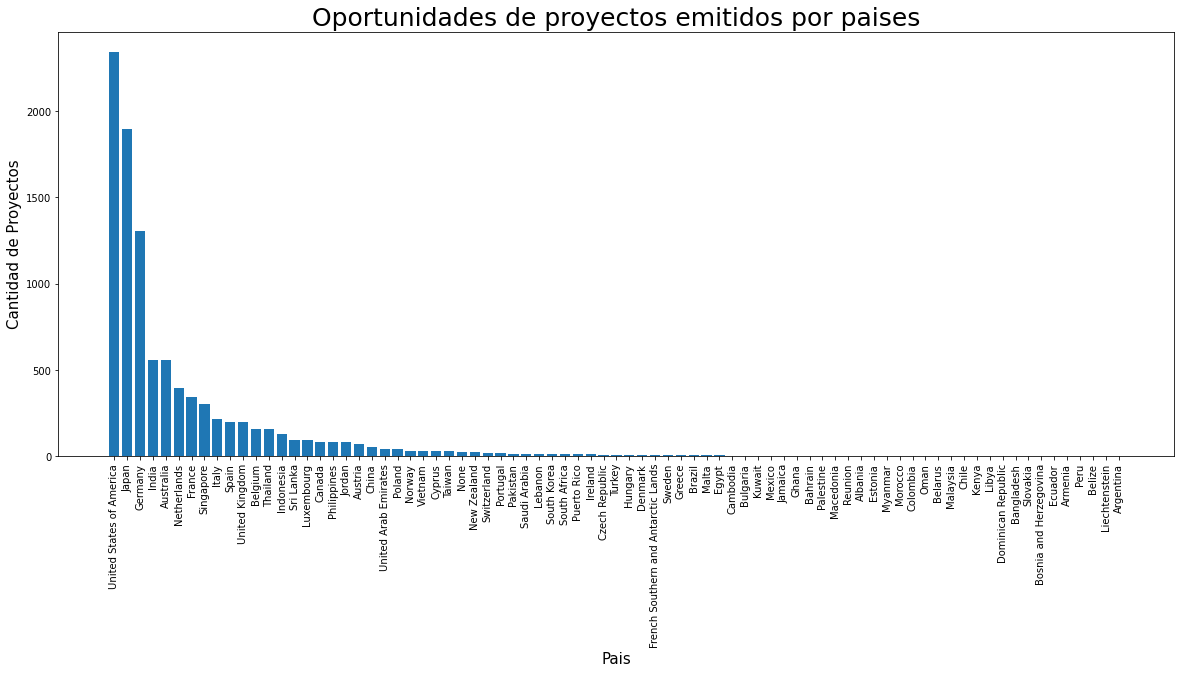

In [42]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
 
# Choose the height of the bars
height = list(coin_country["Billing_Country"])
 
# Choose the names of the bars
bars = list(coin_country["index"])
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=90)
 
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.xlabel('Pais',fontsize=15)
plt.ylabel('Cantidad de Proyectos',fontsize=15)
plt.title("Oportunidades de proyectos emitidos por paises",fontsize=25)
 
# Show graphic
plt.show()



### Moneda

In [43]:
#TIPOS UNICOS DE PAISES QUE EMITEN FACTURAS
solo_currency=data.loc[:,["Currency","Billing_Country","Region","Territory"]]

solo_currency

,Currency,Billing_Country,Region,Territory
0,None,Netherlands,EMEA,None
1,None,Netherlands,EMEA,None
2,None,United States of America,Americas,NW America
3,USD,United States of America,Americas,NW America
4,USD,United States of America,Americas,NW America
...,...,...,...,...
16942,None,Austria,EMEA,Austria
16943,None,Austria,EMEA,Austria
16944,None,Austria,EMEA,Austria
16945,None,United States of America,Americas,NE America


In [45]:
data["Region"].unique()

array(['EMEA', 'Americas', 'Japan', 'APAC', 'Middle East'], dtype=object)

In [46]:
pd.set_option('max_rows', 20)

### Intentar hacer grafico de violin

In [48]:
#Saco Nanas y infinitos
amount["Total_Taxable_Amount_converted-mean"] = amount["Total_Taxable_Amount_converted-mean"].replace([np.inf, -np.inf], np.nan).dropna() 

Text(0, 0.5, 'ASP')

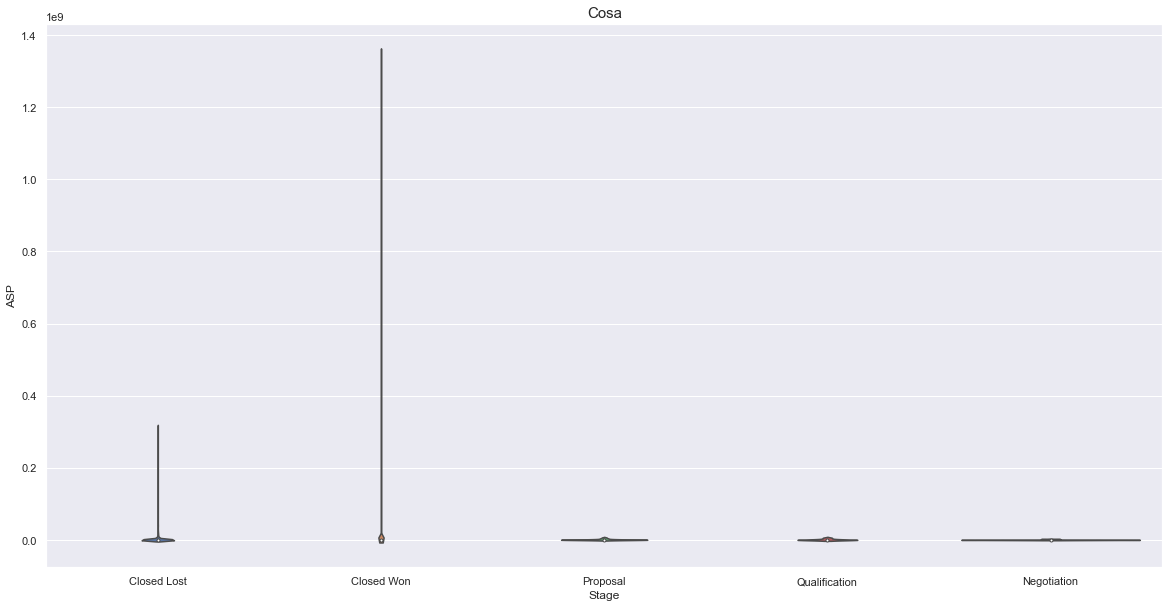

In [49]:
# library & dataset
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})

# Just switch x and y
ax = sns.violinplot( x=amount["Stage-mode"], y=amount["Total_Taxable_Amount_converted-mean"] )
ax.set_title('Cosa',fontsize=15)
ax.set_xlabel('Stage')
ax.set_ylabel('ASP')
#sns.plt.show()


##### Como el Amount abarca un rango alto, el plot no se aprecia

In [50]:
#Aplico ln del Amount, excepto a los ceros
import numpy as np
amount["ln Total Amount converted"]= amount["Total_Taxable_Amount_converted-mean"].apply(lambda x: np.log(x) if x!=0 else x)


Text(0, 0.5, 'ln Total Amount')

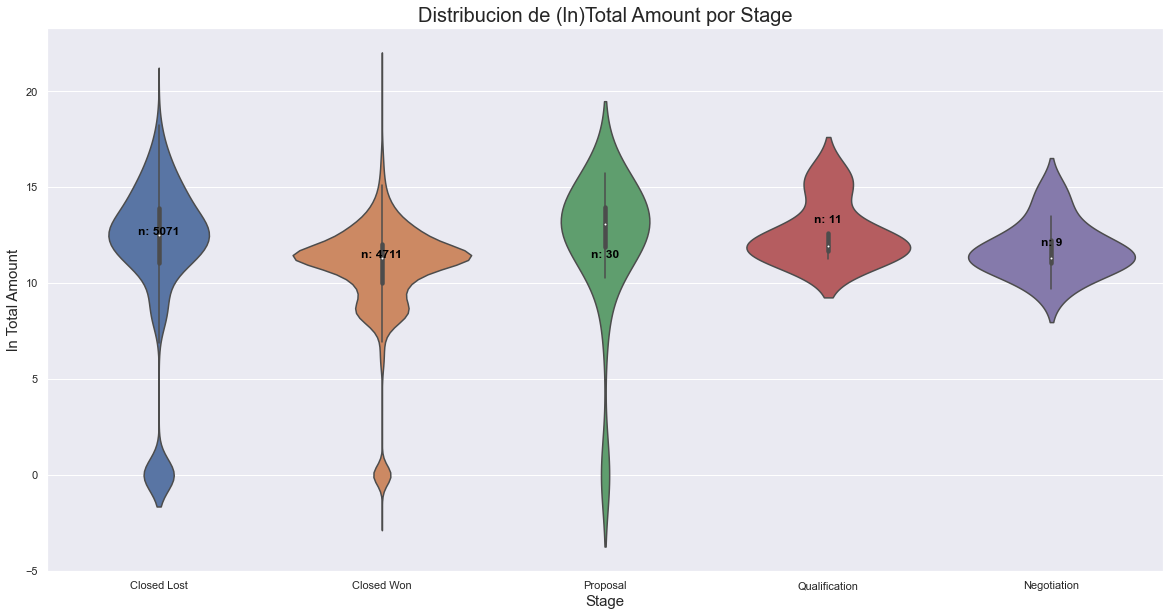

In [51]:
# library & dataset
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})

# Just switch x and y
ax = sns.violinplot( x=amount["Stage-mode"], y=amount["ln Total Amount converted"] )


# Calculate number of obs per group & median to position labels
medians = amount.groupby(['Stage-mode'])['ln Total Amount converted'].median().values
nobs = amount['Stage-mode'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
   ax.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', color='black', weight='semibold')

#Titles
ax.set_title('Distribucion de (ln)Total Amount por Stage',fontsize=20)
ax.set_xlabel('Stage',fontsize=15)
ax.set_ylabel('ln Total Amount',fontsize=15)
#sns.plt.show()

##### Entre los 10k de proyectos, menos de 60 estan en Qualification(11), Proposal(30) y Negotiation(9)

#### Oportunidades Filtradas

In [54]:
gr=amount.groupby(["Stage-mode"]).agg({"Billing_Country-":["count"]})
gr

,Billing_Country-
,count
Stage-mode,
Closed Lost,4711
Closed Won,5071
Negotiation,11
Proposal,30
Qualification,9


In [55]:
gr["Billing_Country-"]["count"].sum()

9832

#### FILTRO DE ARIEL

In [234]:

# renombro columnas
data.rename(columns={'Source ':'Source', 'Pricing, Delivery_Terms_Quote_Appr':'Pricing, Delivery_Terms_Quote_Approval', 'ASP_(converted)':'ASP_(converted_to_usd)'}, inplace=True)

# 1 - Elimino la columna 'Submitted_for_Approval' porque todos sus valores son iguales a
# 2 - Elimino la columna 'Last_Activity' porque todos sus valores son iguales a NaT
# 3 - Elimino la columna 'ASP_(converted)_Currency' porque todos sus valores son iguales a USD
# 4 - Elimino la columna 'Actual_Delivery_Date' porque todos sus valores son iguales a NaT
# 5 - Elimino la columna 'Prod_Category_A' porque todos sus valores son iguales a Prod_Category_A_None
data.drop(['Submitted_for_Approval','Last_Activity', 'ASP_(converted)_Currency', 'Actual_Delivery_Date','Prod_Category_A'], axis=1, errors='ignore', inplace=True)

# convertir object a datetime
data['Account_Created_Date']        = pd.to_datetime(data['Account_Created_Date'], format='%m/%d/%Y', errors='coerce')
data['Opportunity_Created_Date']    = pd.to_datetime(data['Opportunity_Created_Date'], format='%m/%d/%Y', errors='coerce')
data['Quote_Expiry_Date']           = pd.to_datetime(data['Quote_Expiry_Date'], format='%m/%d/%Y', errors='coerce')
data['Last_Modified_Date']          = pd.to_datetime(data['Last_Modified_Date'], format='%m/%d/%Y', errors='coerce')
data['Planned_Delivery_Start_Date'] = pd.to_datetime(data['Planned_Delivery_Start_Date'], format='%m/%d/%Y', errors='coerce')
data['Planned_Delivery_End_Date']   = pd.to_datetime(data['Planned_Delivery_End_Date'], format='%m/%d/%Y', errors='coerce')

#se elimina la fila con Planned_Delivery_End_Date=2208-12-31 (TODO ¿eliminar o nullear?)
data = data.drop(data[data['Planned_Delivery_End_Date']=='2208-12-31'].index)

data.head()

c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Approval","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted_to_usd),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,cumpled_,Value_ASP_converted_to_ASP,Total_Amount_converted,Total_Taxable_Amount_converted
0,27761,EMEA,None,1,1,1,1,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,2016-01-30,2016-06-13,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,0.58817,2016-05-01,2016-06-30,2016 - 5,Q2,2016,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,False,1.131096,5964043.80,5964043.80
1,27760,EMEA,None,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,2016-01-20,2016-01-15,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,0.59948,2016-01-18,2016-01-20,2016 - 1,Q1,2016,0,EUR,48230.0,EUR,48230.0,Closed Won,False,1.131094,54552.68,54552.68
2,27446,Americas,NW America,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States of America,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,2016-09-30,2016-09-29,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,0.48000,2016-01-25,2016-01-25,2016 - 1,Q1,2016,0,USD,83865.6,USD,83865.6,Closed Won,False,1.000000,83865.60,83865.60
3,16808,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States of America,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,0.53000,2018-02-01,2018-03-31,2018 - 2,Q1,2018,14,USD,7421881.5,USD,7421881.5,Closed Lost,False,1.000000,7421881.50,7421881.50
4,16805,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States of America,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,2017-06-02,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,0.53000,2018-02-01,2018-02-28,2018 - 2,Q1,2018,25,USD,13357192.5,USD,13357192.5,Closed Lost,False,1.000000,13357192.50,13357192.50


In [235]:
data['Month_Created'] = data['Opportunity_Created_Date'].dt.month 
data['Year_Created'] = data['Opportunity_Created_Date'].dt.year
data['Year_Created'] = data['Opportunity_Created_Date'].dt.year
data['Periodo'] = data['Planned_Delivery_End_Date'] - data['Planned_Delivery_Start_Date']
data['Periodo']=data['Periodo'] / pd.Timedelta(1, unit='d')
#data['Periodo'].astype('timedelta64[D]')

In [236]:
data

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Approval","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted_to_usd),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,cumpled_,Value_ASP_converted_to_ASP,Total_Amount_converted,Total_Taxable_Amount_converted,Month_Created,Year_Created,Periodo
0,27761,EMEA,None,1,1,1,1,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,2016-01-30,2016-06-13,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,0.58817,2016-05-01,2016-06-30,2016 - 5,Q2,2016,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,False,1.131096,5.964044e+06,5.964044e+06,12,2015,60.0
1,27760,EMEA,None,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,2016-01-20,2016-01-15,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,0.59948,2016-01-18,2016-01-20,2016 - 1,Q1,2016,0,EUR,48230.00,EUR,48230.0,Closed Won,False,1.131094,5.455268e+04,5.455268e+04,12,2015,2.0
2,27446,Americas,NW America,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States of America,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,2016-09-30,2016-09-29,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,0.48000,2016-01-25,2016-01-25,2016 - 1,Q1,2016,0,USD,83865.60,USD,83865.6,Closed Won,False,1.000000,8.386560e+04,8.386560e+04,12,2015,0.0
3,16808,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States of America,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,0.53000,2018-02-01,2018-03-31,2018 - 2,Q1,2018,14,USD,7421881.50,USD,7421881.5,Closed Lost,False,1.000000,7.421882e+06,7.421882e+06,12,2015,58.0
4,16805,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States of America,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,2017-06-02,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,0.53000,2018-02-01,2018-02-28,2018 - 2,Q1,2018,25,USD,13357192.50,USD,13357192.5,Closed Lost,False,1.000000,1.335719e+07,1.335719e+07,12,2015,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-04,None,None,None,None,None,None,NaT,2016-01-19,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,0.58817,2016-03-21,2016-03-25,20

In [134]:
asd = data.groupby(["Opportunity_Name"]).agg({'Year_Created':pd.Series.mode, 'Month_Created':pd.Series.mode, "Stage":pd.Series.mode, "Periodo":"max"}).reset_index()
asd

,Opportunity_Name,Year_Created,Month_Created,Stage,Periodo
0,Opportunity_Name_0,2016,3,Closed Lost,30.0
1,Opportunity_Name_1,2016,3,Closed Lost,30.0
2,Opportunity_Name_100,2017,4,Closed Won,7.0
3,Opportunity_Name_1000,2015,7,Closed Lost,0.0
4,Opportunity_Name_10000,2016,12,Closed Lost,1.0
...,...,...,...,...,...
9827,Opportunity_Name_9992,2017,3,Closed Lost,0.0
9828,Opportunity_Name_9995,2018,2,Closed Lost,0.0
9829,Opportunity_Name_9996,2016,11,Closed Lost,25.0
9830,Opportunity_Name_9997,2017,9,Closed Lost,88.0


#### Stacker Plot Evol por Año

In [291]:
by_year = asd.groupby(["Year_Created","Month_Created","Stage"]).agg({"Opportunity_Name":"count"}).reset_index()

In [292]:
by_year

,Year_Created,Month_Created,Stage,Opportunity_Name
0,2013,11,Closed Lost,1
1,2014,3,Closed Lost,2
2,2014,5,Closed Lost,1
3,2014,5,Closed Won,1
4,2014,6,Closed Won,1
...,...,...,...,...
114,2018,12,Closed Lost,17
115,2018,12,Closed Won,83
116,2018,12,Negotiation,6
117,2018,12,Proposal,11


In [293]:
def coso(x):
    stages =["Closed Won","Closed Lost", "Proposal", "Qualification","Negotiation"]
    devolver =[]
    for i in stages:
        asd =x[x["Stage"]==i]
        asd
        a=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        for y in range(0, len(asd)): 
            if (asd.iloc[y,0] == 2013):
                if (asd.iloc[y,1] == 1):
                    a[0]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 2):
                    a[1]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 3):
                    a[2]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 4):
                    a[3]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 5):
                    a[4]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 6):
                    a[5]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 7):
                    a[6]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 8):
                    a[7]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 9):
                    a[8]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 10):
                    a[9]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 11):
                    a[10]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 12):
                    a[11]=(asd.iloc[y,3])
            if (asd.iloc[y,0] == 2014):
                if (asd.iloc[y,1] == 1):
                    a[12]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 2):
                    a[13]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 3):
                    a[14]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 4):
                    a[15]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 5):
                    a[16]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 6):
                    a[17]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 7):
                    a[18]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 8):
                    a[19]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 9):
                    a[20]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 10):
                    a[21]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 11):
                    a[22]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 12):
                    a[23]=(asd.iloc[y,3])
            if (asd.iloc[y,0] == 2015):
                if (asd.iloc[y,1] == 1):
                    a[24]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 2):
                    a[25]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 3):
                    a[26]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 4):
                    a[27]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 5):
                    a[28]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 6):
                    a[29]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 7):
                    a[30]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 8):
                    a[31]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 9):
                    a[32]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 10):
                    a[33]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 11):
                    a[34]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 12):
                    a[35]=(asd.iloc[y,3])
            if (asd.iloc[y,0] == 2016):
                if (asd.iloc[y,1] == 1):
                    a[36]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 2):
                    a[37]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 3):
                    a[38]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 4):
                    a[39]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 5):
                    a[40]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 6):
                    a[41]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 7):
                    a[42]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 8):
                    a[43]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 9):
                    a[44]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 10):
                    a[45]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 11):
                    a[46]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 12):
                    a[47]=(asd.iloc[y,3])
            if (asd.iloc[y,0] == 2017):
                if (asd.iloc[y,1] == 1):
                    a[48]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 2):
                    a[49]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 3):
                    a[50]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 4):
                    a[51]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 5):
                    a[52]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 6):
                    a[53]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 7):
                    a[54]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 8):
                    a[55]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 9):
                    a[56]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 10):
                    a[57]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 11):
                    a[58]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 12):
                    a[59]=(asd.iloc[y,3])
            if (asd.iloc[y,0] == 2018):
                if (asd.iloc[y,1] == 1):
                    a[60]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 2):
                    a[61]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 3):
                    a[62]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 4):
                    a[63]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 5):
                    a[64]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 6):
                    a[65]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 7):
                    a[66]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 8):
                    a[67]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 9):
                    a[68]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 10):
                    a[69]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 11):
                    a[70]=(asd.iloc[y,3])
                if (asd.iloc[y,1] == 12):
                    a[71]=(asd.iloc[y,3])
        print (a)
        devolver.append(a)
    return devolver 

y=coso(by_year)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 3, 3, 5, 2, 4, 3, 12, 10, 26, 59, 69, 58, 81, 71, 61, 79, 93, 118, 109, 136, 135, 170, 139, 165, 237, 212, 275, 260, 194, 181, 155, 190, 121, 121, 157, 94, 111, 116, 140, 118, 141, 110, 124, 174, 139, 83]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 2, 0, 2, 3, 0, 2, 4, 5, 6, 39, 5, 15, 31, 16, 91, 37, 47, 84, 98, 99, 84, 67, 106, 93, 149, 95, 118, 135, 99, 245, 126, 156, 200, 150, 202, 227, 111, 109, 153, 132, 90, 139, 130, 141, 111, 94, 120, 94, 125, 98, 54, 82, 69, 17]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 6, 10, 11]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 7

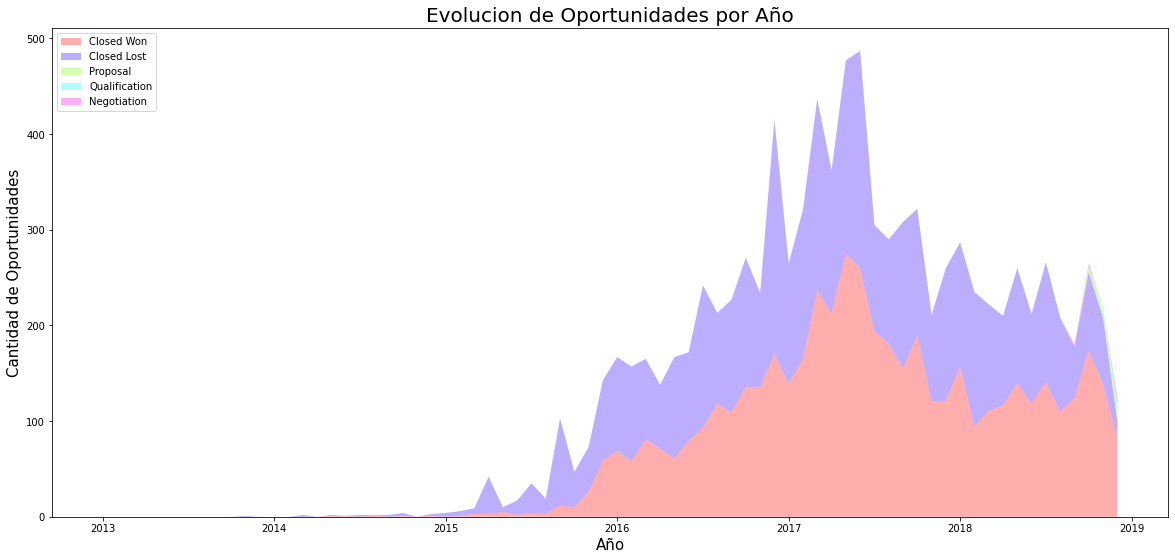

In [298]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
# Data
x=[2013,2013+(1/12),2013+(2/12),2013+(3/12),2013+(4/12),2013+(5/12),2013+(6/12),2013+(7/12),2013+(8/12),2013+(9/12),2013+(10/12),2013+(11/12),\
    2014,2014+(1/12),2014+(2/12),2014+(3/12),2014+(4/12),2014+(5/12),2014+(6/12),2014+(7/12),2014+(8/12),2014+(9/12),2014+(10/12),2014+(11/12),\
    2015,2015+(1/12),2015+(2/12),2015+(3/12),2015+(4/12),2015+(5/12),2015+(6/12),2015+(7/12),2015+(8/12),2015+(9/12),2015+(10/12),2015+(11/12),\
    2016,2016+(1/12),2016+(2/12),2016+(3/12),2016+(4/12),2016+(5/12),2016+(6/12),2016+(7/12),2016+(8/12),2016+(9/12),2016+(10/12),2016+(11/12),\
    2017,2017+(1/12),2017+(2/12),2017+(3/12),2017+(4/12),2017+(5/12),2017+(6/12),2017+(7/12),2017+(8/12),2017+(9/12),2017+(10/12),2017+(11/12),\
    2018,2018+(1/12),2018+(2/12),2018+(3/12),2018+(4/12),2018+(5/12),2018+(6/12),2018+(7/12),2018+(8/12),2018+(9/12),2018+(10/12),2018+(11/12)]
 
# Plot
pal = ["#FF3333", "#5B33FF", "#90FF33", "#33FFFC", "#FF33E9"]

plt.stackplot(x,y, labels=["Closed Won","Closed Lost", "Proposal", "Qualification","Negotiation"], colors=pal, alpha=0.4)
plt.legend(loc='upper left')
plt.ylabel("Cantidad de Oportunidades",fontsize=15)
plt.xlabel("Año",fontsize=15)
plt.title('Evolucion de Oportunidades por Año',fontsize=20)
plt.show()


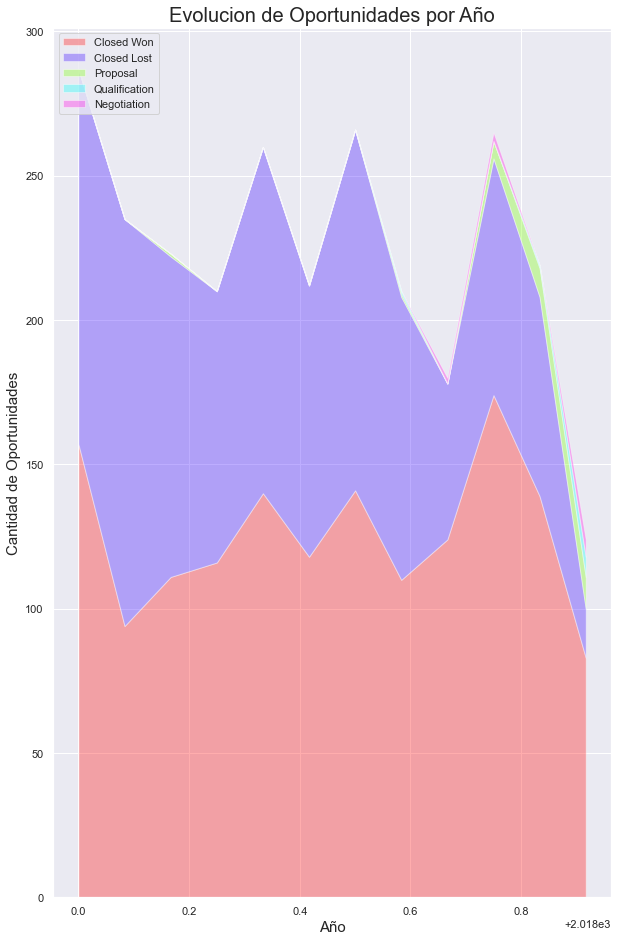

In [302]:
# Data
sns.set(rc={'figure.figsize':(10,16)})
x=[2018,2018+(1/12),2018+(2/12),2018+(3/12),2018+(4/12),2018+(5/12),2018+(6/12),2018+(7/12),2018+(8/12),2018+(9/12),2018+(10/12),2018+(11/12)]
y=[[157, 94, 111, 116, 140, 118, 141, 110, 124, 174, 139, 83],
   [130, 141, 111, 94, 120, 94, 125, 98, 54, 82, 69, 17],
   [0, 0, 1, 0, 0, 0, 0, 1, 0, 6, 10, 11],
   [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 7],
   [0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 6]]

# Plot
pal = ["#FF3333", "#5B33FF", "#90FF33", "#33FFFC", "#FF33E9"]

plt.stackplot(x,y, labels=["Closed Won","Closed Lost", "Proposal", "Qualification","Negotiation"], colors=pal, alpha=0.4)
plt.legend(loc='upper left')
plt.ylabel("Cantidad de Oportunidades",fontsize=15)
plt.xlabel("Año",fontsize=15)
plt.title('Evolucion de Oportunidades por Año',fontsize=20)
plt.show()

#### Delivery End y Start

In [137]:
asd[asd["Periodo"]>800]

,Opportunity_Name,Year_Created,Month_Created,Stage,Periodo
3016,Opportunity_Name_1893,2017,5,Closed Won,1096.0


Text(0.5, 0, 'Dias')

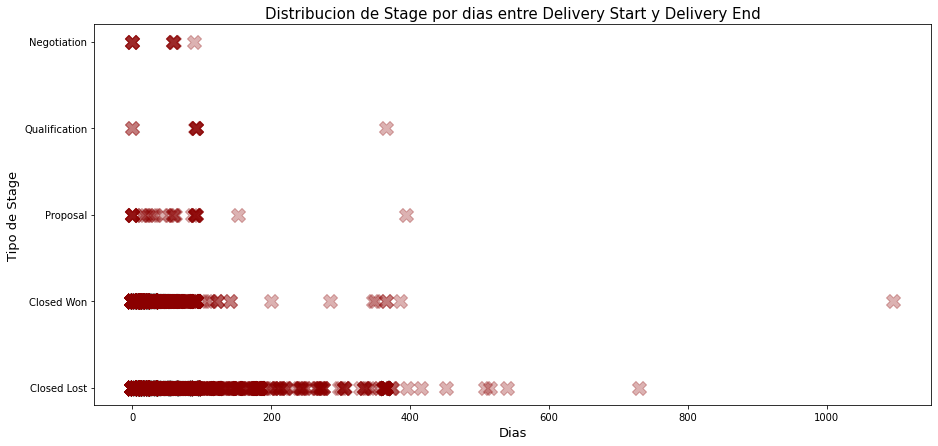

In [147]:
# library and dataset
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 7)

# Change shape of marker
g=sns.regplot(x=asd["Periodo"], y=asd["Stage"],marker =u'X', fit_reg=False, scatter_kws={"color":"darkred","alpha":0.3,"s":200} )
g.set_title("Distribucion de Stage por dias entre Delivery Start y Delivery End", fontsize=15)
g.set_ylabel("Tipo de Stage", fontsize=13,)
g.set_xlabel("Dias", fontsize=13)


#### HEATMAPS

In [117]:
import numpy as np 

In [148]:
asd2 = asd.groupby(["Stage","Year_Created","Month_Created"]).agg({"Opportunity_Name":"count"}).reset_index()


Text(159.0, 0.5, 'Año de Oortunidad creada')

<Figure size 1440x504 with 0 Axes>

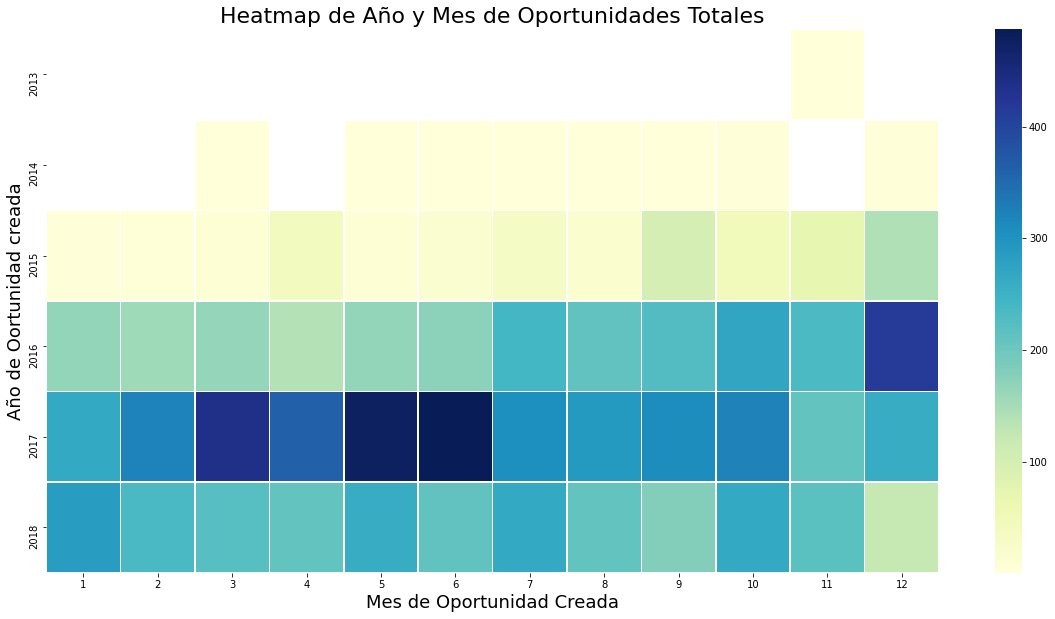

In [104]:
columnas = ["Year_Created","Month_Created","Opportunity_Name"]
publicado = asd2[columnas]
publicado = publicado.pivot_table(index='Year_Created', columns='Month_Created', values='Opportunity_Name',aggfunc=np.sum)
plt.figure(figsize=(20,7))
plt.figure(figsize=(20,10))
g = sns.heatmap(publicado,  cmap="YlGnBu", linewidths=.5)
g.set_ylim(6,-0,1)
g.set_title("Heatmap de Año y Mes de Oportunidades Totales", fontsize=22)
g.set_xlabel("Mes de Oportunidad Creada",fontsize=18)
g.set_ylabel("Año de Oortunidad creada", fontsize=18)

In [77]:
asd2["Opportunity_Name"].sum()

9832

In [78]:
Won = asd2[asd2["Stage"]=="Closed Won"]
Won["Opportunity_Name"].sum()

5071

Text(159.0, 0.5, 'Año de Oortunidad creada')

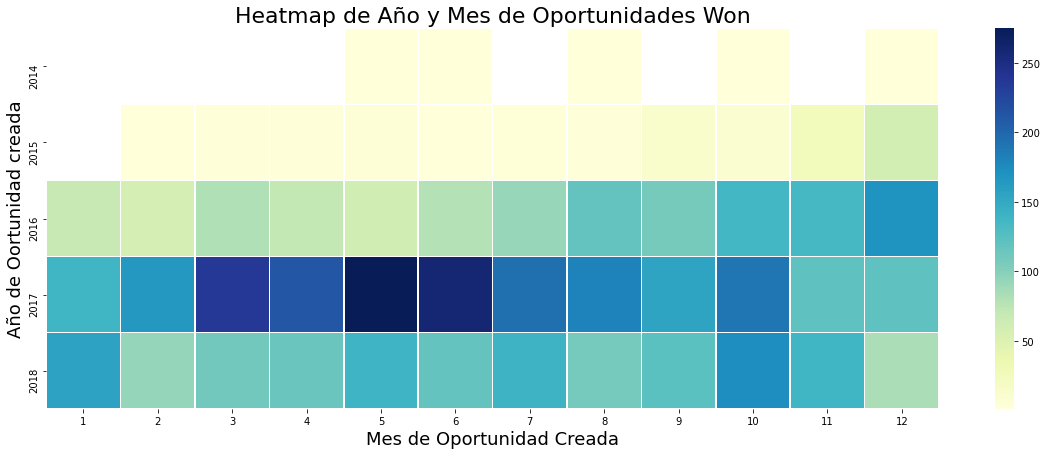

In [106]:
columnas = ["Year_Created","Month_Created","Opportunity_Name"]
publicado = Won[columnas]
publicado = publicado.pivot_table(index='Year_Created', columns='Month_Created', values='Opportunity_Name',aggfunc=np.sum)
plt.figure(figsize=(20,7))
g = sns.heatmap(publicado,  cmap="YlGnBu", linewidths=.5)
g.set_ylim(5,-0,1)
g.set_title("Heatmap de Año y Mes de Oportunidades Won", fontsize=22)
g.set_xlabel("Mes de Oportunidad Creada",fontsize=18)
g.set_ylabel("Año de Oortunidad creada", fontsize=18)

In [82]:
Lost = asd2[amount["Stage"]=="Closed Lost"]
Lost["Opportunity_Name"].sum()

4711

Text(159.0, 0.5, 'Año de Oortunidad creada')

<Figure size 1440x504 with 0 Axes>

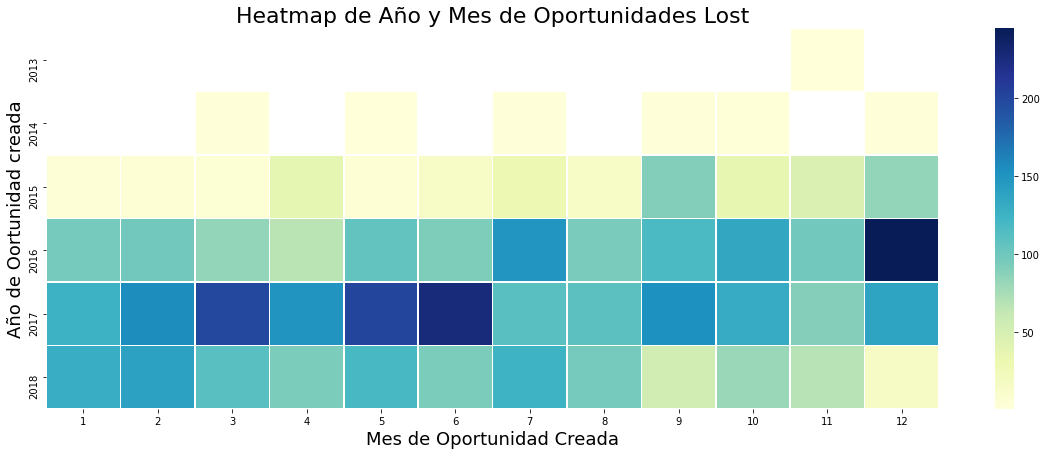

In [107]:
columnas = ["Year_Created","Month_Created","Opportunity_Name"]
publicado = Lost[columnas]
publicado = publicado.pivot_table(index='Year_Created', columns='Month_Created', values='Opportunity_Name',aggfunc=np.sum)
plt.figure(figsize=(20,7))
plt.figure(figsize=(20,7))
g = sns.heatmap(publicado,  cmap="YlGnBu", linewidths=.5)
g.set_ylim(6,-0,1)
g.set_title("Heatmap de Año y Mes de Oportunidades Lost", fontsize=22)
g.set_xlabel("Mes de Oportunidad Creada",fontsize=18)
g.set_ylabel("Año de Oortunidad creada", fontsize=18)